## Module 2:

## Team Members:
*Jaya Kinley and Luke Shee*

## Project Title:
*Depth-Based Prediction of Lung Fibrosis Using Image Analysis*



## Project Goal:
This project seeks to create an image analysis system that can predict how much lung fibrosis is present at different biopsy depths. This will help support the design of a new lung biopsy device that can better detect early signs of fibrosis in people affected by vaping.

## Disease Background: 

### Prevalence & incidence 
(Source: https://medlineplus.gov/genetics/condition/idiopathic-pulmonary-fibrosis/#frequency and https://respiratory-research.biomedcentral.com/articles/10.1186/s12931-021-01791-z#citeas)
  - **Prevalence**: Globally, It’s predicted that every 13-20 people out of 100,000 have idiopathic pulmonary fibrosis, generally making the condition rare.
    - It’s estimated by MedlinePlus that ~100,000 people in the U.S. have idiopathic pulmonary fibrosis. Other sources, however, calculate different values for the prevalence in America, like a study from Maher et al. (the 2nd source) estimating that 2.4 out of 10,000 Americans have idiopathic pulmonary fibrosis (totaling up to around 81,600 cases currently).
  - **Incidence**: Every year, 30 to 40 thousand newly diagnosed cases for idiopathic pulmonary fibrosis occur.

### Risk factors (genetic, lifestyle) 
(Sources: https://www.pulmonaryfibrosis.org/understanding-pff/types-of-pulmonary-fibrosis/idiopathic-pulmonary-fibrosis and https://www.youtube.com/watch?v=Z6_0WkceY88)
  - Some general risk factors may include being male and/or growing to an old age, as well as the lifestyle risk factor of smoking.
    - While not as certain as the aforementioned risk factors, external exposures to air pollution or viral infection may also correlate to idiopathic pulmonary fibrosis diagnosis.  
  - Concerning genetic risk factors, people who inherited specific genes, including “MUC5B, TERT, TERC, DKC1, RTEL1, AKAP13, DSP, FAM13A, DPP9, and TOLLIP,” may have a higher chance of getting pulmonary fibrosis.

### Symptoms 
(Source: https://www.mayoclinic.org/diseases-conditions/pulmonary-fibrosis/symptoms-causes/syc-20353690)
  - Shortness of breath
  - Dry cough
  - Extreme tiredness
  - Weight loss that's not intended
  - Aching muscles and joints
  - Widening and rounding of the tips of the fingers or toes, called clubbing
    
### Standard of care treatment(s) 
(Sources: https://www.mayoclinic.org/diseases-conditions/pulmonary-fibrosis/diagnosis-treatment/drc-20353695 and https://www.lung.org/lung-health-diseases/lung-disease-lookup/pulmonary-fibrosis/patients/how-is-pulmonary-fibrosis-treated/medications)
  - Lung scarring and thickening that occurs in pulmonary fibraosi cannot be repaired
  - no treatment has proved effective in stopping disease from worsening
  - treatments that improve symptoms, slow progression, and/or enhance quality of life
    - **medicines**: pirfenidone (Esbriet) or nintedanib (Ofeb): anti-fibrotic agents, may help slow worsening of fibrosis and may prevent bouts of aggressive symptom onset
    - **other medicines**: drugs to reduce inflammation (e.g. steroids), drugs to treat acid reflux (commonly occurs in people with pulmonary fibrosis), drugs to treat cough
    - **oxygen therapy**: makes breathing/exercise easier, prevents/lessens complications from low blood oxygen levels, lessens strain on right side of heart, improves sleep
    - **pulmonary rehibilitation**: physical exercise to improve daily function, breathing techniques improving lung efficiency, nutritional counseling, emotional counseling
    - **lung transplant**: can improve quality/length of life, can involve complications (rejection or infection), requires lifelong medicinal treatment following transplant  


### Biological mechanisms (anatomy, organ physiology, cell & molecular physiology) 
(Sources: https://www.youtube.com/watch?v=Z6_0WkceY88 and https://www.youtube.com/watch?v=s2owdwl5VacLinks)
  - normally, tissue of alveoli is soft and flexible, allowing easy breathing and O2 exchange between alveoli and capillaries
  - in IPF, excess collagen forms scarring in interstatial tissue, which impairs the lungs' ability to absorb O2 and function normally
  - anatomy of alveoli
    - type 1 epithelial cells (pneymocytes): squamous cells, near continupus barrier between air and connective tissue
    - type 2 pneymocytes: studded throughout type 1, shaped like cubes, have microvilli, secrete surfactant (prevent alveoli from collapsing during exhilation), can divide and make more type 2 or type 1 pneumocytes
  - interstatial tissue
    - has macrophages and fibroblasts
    - between type 2 pneumocytes and capillaries
  - when alveolar lining damaged, proliferation of fibroblassts to myofibroblasts stimulated --> secrete reticular and elastic fibers
  - myofibroblasts undergo apoptosis (programmed cell death)
  - once process is triggered, type 2 pneumocytes over-proliferate during repair process --> too many myofibroblasts and too much collagen
  - myofibroblasts don't undergo apoptosis proberly and continue to produce more collagen
  - collagen accumulates and thickens interstatial layer --> problems with ventilation and oxygenation, causes lungs to become stiff
  - excess collagen leads to loss of alveoli, creating cysts surrounded by thick walls (honeycombing)

## Data-Set: 
The dataset used in this project consists of lung biopsy mask images taken at different tissue depths, measured in microns. Each image represents a cross-section of lung tissue stained to highlight areas of fibrosis. The white regions in the images correspond to fibrotic tissue, while the black regions represent healthy lung areas. These images were collected using histological imaging techniques similar to those described in biomedical imaging studies such as the SEA-AD dataset from the BRAIN Initiative. The data provide a way to analyze how the amount of fibrosis changes with depth in the lung.

## Data Analyis: 
This code analyzes a set of lung biopsy mask images to estimate the amount of fibrotic tissue at different depths in the lung. It loads each image, counts the number of black and white pixels, and calculates the percentage of white pixels, which represent fibrosis. The results are saved to a CSV file, and an interpolation function is used to estimate the fibrosis percentage at any chosen depth. Finally, the code generates plots showing how the percentage of fibrotic tissue changes with biopsy depth and highlights the interpolated point in red.

### Importing Libraries:

In [20]:
from termcolor import colored
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

### Load Image Files and Depth Data:

In [21]:
# List out filenames for selected biopsy images (one is commented so other person can test code)
"""
filenames = [
    r"/Users/jayakinley/Desktop/compbme/course_files_export/MASK_Sk658 Llobe ch010032.jpg",
    r"/Users/jayakinley/Desktop/compbme/course_files_export/MASK_Sk658 Llobe ch010146.jpg",
    r"/Users/jayakinley/Desktop/compbme/course_files_export/MASK_SK658 Slobe ch010110.jpg",
    r"/Users/jayakinley/Desktop/compbme/course_files_export/MASK_SK658 Slobe ch010063.jpg",
    r"/Users/jayakinley/Desktop/compbme/course_files_export/MASK_SK658 Slobe ch010136.jpg",
    r"/Users/jayakinley/Desktop/compbme/course_files_export/MASK_SK658 Slobe ch010098.jpg",
    ]
"""
filenames = [
    r"/Users/Lukin/OneDrive/Desktop/UVA Stuff/Comp BME/Lung_Fibrosis_Jupyter/course_files_export/MASK_Sk658 Llobe ch010032.jpg",
    r"/Users/Lukin/OneDrive/Desktop/UVA Stuff/Comp BME/Lung_Fibrosis_Jupyter/course_files_export/MASK_Sk658 Llobe ch010146.jpg",
    r"/Users/Lukin/OneDrive/Desktop/UVA Stuff/Comp BME/Lung_Fibrosis_Jupyter/course_files_export/MASK_SK658 Slobe ch010110.jpg",
    r"/Users/Lukin/OneDrive/Desktop/UVA Stuff/Comp BME/Lung_Fibrosis_Jupyter/course_files_export/MASK_SK658 Slobe ch010063.jpg",
    r"/Users/Lukin/OneDrive/Desktop/UVA Stuff/Comp BME/Lung_Fibrosis_Jupyter/course_files_export/MASK_SK658 Slobe ch010136.jpg",
    r"/Users/Lukin/OneDrive/Desktop/UVA Stuff/Comp BME/Lung_Fibrosis_Jupyter/course_files_export/MASK_SK658 Slobe ch010098.jpg",
    ]


# Enter the depth of each image (in the same order that the images are listed above; you can find these in the .csv file provided to you which is tilted: "Filenames and Depths for Students")

depths = [
    500,
    2000,
    5300,
    7400,
    9200,
    10000
    ]

### Read and Store Images: 

In [22]:
images = []
white_counts = []
black_counts = []
white_percents = []

# Build the list of all the images you are analyzing

for filename in filenames:
    img = cv2.imread(filename, 0)
    images.append(img)

### Count Black and White Pixels:

In [23]:
# Iterate through list of selected lung biopsy images to count the number of white and black pixels for each one, appending them to lists
for x in range(len(filenames)):
    _, binary = cv2.threshold(images[x], 127, 255, cv2.THRESH_BINARY)

    white = np.sum(binary == 255)
    black = np.sum(binary == 0)

    white_counts.append(white)
    black_counts.append(black)

# Print the number of white and black pixels in each image.

print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(filenames)):
    print(colored(f"White pixels in image {x}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x}: {black_counts[x]}", "black"))
    print()

Counts of pixel by color in each image
White pixels in image 0: 48667
Black pixels in image 0: 4145637

White pixels in image 1: 145829
Black pixels in image 1: 4048475

White pixels in image 2: 96012
Black pixels in image 2: 4098292

White pixels in image 3: 120910
Black pixels in image 3: 4073394

White pixels in image 4: 163638
Black pixels in image 4: 4030666

White pixels in image 5: 383479
Black pixels in image 5: 3810825



### Calculate Percent White Pixels

In [24]:
# Iterate through list of selected lung biopsy images to calculate and append the percent white pixels to a list
for x in range(len(filenames)):
    white_percent = (100 * (white_counts[x] / (black_counts[x] + white_counts[x])))
    white_percents.append(white_percent)

# Print the filename (on one line in red font), and below that line print the percent white pixels and depth

print(colored("Percent white px:", "yellow"))
for x in range(len(filenames)):
    print(colored(f'{filenames[x]}:',"red"))
    print(f'{white_percents[x]}% White | Depth: {depths[x]} microns')
    print()

Percent white px:
/Users/Lukin/OneDrive/Desktop/UVA Stuff/Comp BME/Lung_Fibrosis_Jupyter/course_files_export/MASK_Sk658 Llobe ch010032.jpg:
1.1603116989135742% White | Depth: 500 microns

/Users/Lukin/OneDrive/Desktop/UVA Stuff/Comp BME/Lung_Fibrosis_Jupyter/course_files_export/MASK_Sk658 Llobe ch010146.jpg:
3.476834297180176% White | Depth: 2000 microns

/Users/Lukin/OneDrive/Desktop/UVA Stuff/Comp BME/Lung_Fibrosis_Jupyter/course_files_export/MASK_SK658 Slobe ch010110.jpg:
2.289104461669922% White | Depth: 5300 microns

/Users/Lukin/OneDrive/Desktop/UVA Stuff/Comp BME/Lung_Fibrosis_Jupyter/course_files_export/MASK_SK658 Slobe ch010063.jpg:
2.882719039916992% White | Depth: 7400 microns

/Users/Lukin/OneDrive/Desktop/UVA Stuff/Comp BME/Lung_Fibrosis_Jupyter/course_files_export/MASK_SK658 Slobe ch010136.jpg:
3.9014339447021484% White | Depth: 9200 microns

/Users/Lukin/OneDrive/Desktop/UVA Stuff/Comp BME/Lung_Fibrosis_Jupyter/course_files_export/MASK_SK658 Slobe ch010098.jpg:
9.1428518

### Save Results to CSV File

In [25]:
import pandas as pd

# Use pandas to make dataframe for results
df = pd.DataFrame({
    'Filenames': filenames,
    'Depths': depths,
    'White percents': white_percents
})

# Send results to external csv file
df.to_csv('Percent_White_Pixels.csv', index=False)

print("CSV file 'Percent_White_Pixels.csv' has been created.")


CSV file 'Percent_White_Pixels.csv' has been created.


### Interpolate Fibrosis at a Chosen Depth (Quadratic)

In [26]:
# Ask for input depth, like 8700 microns
interpolate_depth = float(input(colored("Enter the depth at which you want to interpolate a point: ", "yellow")))

x = depths
y = white_percents

# Use interpolation function and print
i = interp1d(x, y, kind='linear')  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

# Set up lists of depth and white percents for setting scatter data points for later
depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

The interpolated point is at the x-coordinate 8700.0 and y-coordinate 3.6184575822618275.


### Plot Fibrosis vs. Depth

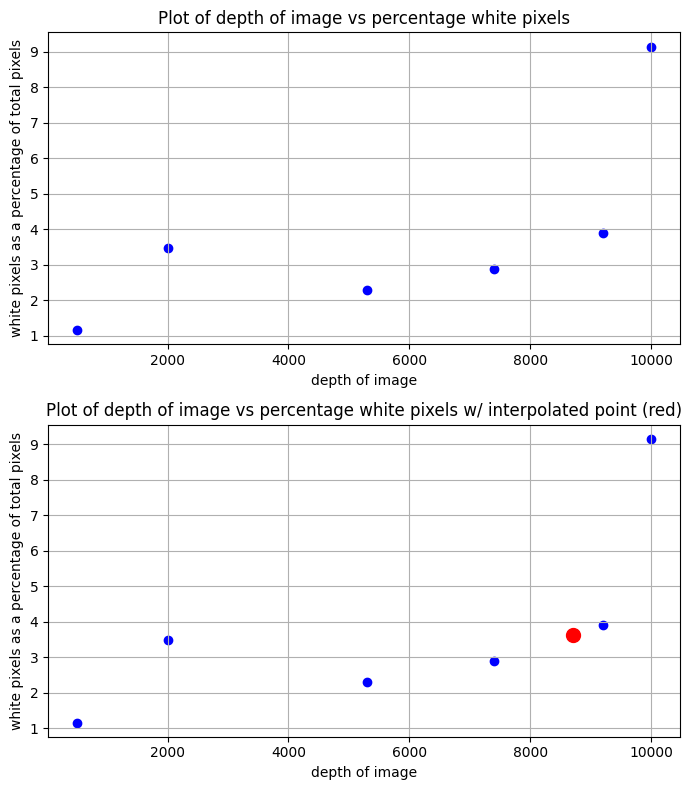

In [27]:
# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

# Set up regular scatter plot
axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image')
axs[0].set_ylabel('white pixels as a percentage of total pixels')
axs[0].grid(True)

# Set up scatter plot with interpolated point
axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (red)')
axs[1].set_xlabel('depth of image')
axs[1].set_ylabel('white pixels as a percentage of total pixels')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')

# Adjust layout to prevent overlap
fig.set_figwidth(7)
fig.set_figheight(8) # Gets rids of overlapping y-axis labels
plt.tight_layout()
plt.show()

### Additional Quadratic Interpolation and Fibrosis vs. Depth Plot

The interpolated point is at the x-coordinate 8700.0 and y-coordinate 2.489935248385199.


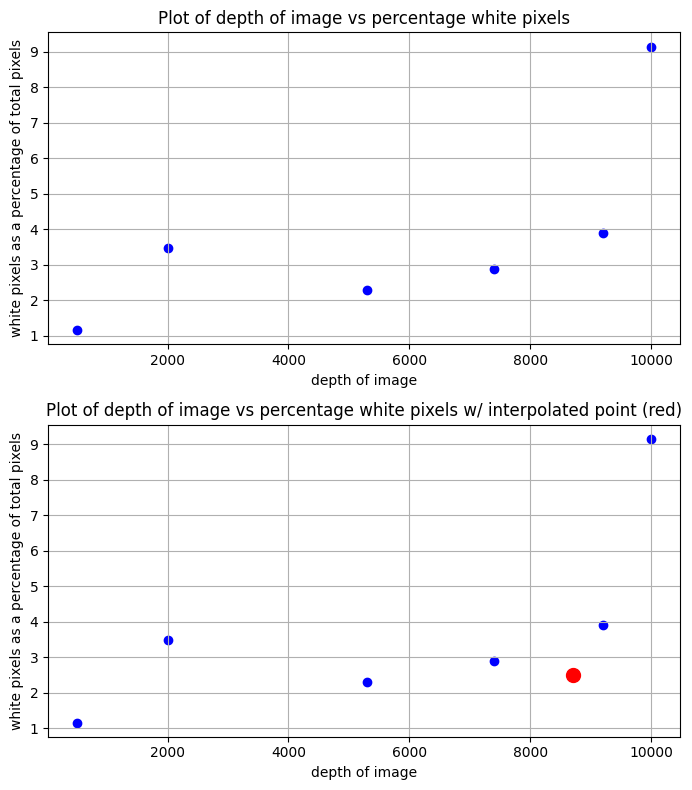

In [28]:
# Copied and pasted previous code blocks to make separate interpolation and plot

# Use interpolation function and print
i = interp1d(x, y, kind='quadratic')  # This time using Quadratic interpolation
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

# Set up lists of depth and white percents for setting scatter data points for later
depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

# Set up regular scatter plot
axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image')
axs[0].set_ylabel('white pixels as a percentage of total pixels')
axs[0].grid(True)

# Set up scatter plot with interpolated point
axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (red)')
axs[1].set_xlabel('depth of image')
axs[1].set_ylabel('white pixels as a percentage of total pixels')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')

# Adjust layout to prevent overlap
fig.set_figwidth(7)
fig.set_figheight(8) # Gets rids of overlapping y-axis labels
plt.tight_layout()
plt.show()

## Verify and validate your analysis: 
The plotted “percent white pixels” data for six lung tissue images, taken at depths of 500, 2000, 5300, 7400, 9200, and 10000 microns, overall support the hypothesis that fibrosis increases with increasing tissue depth. The percent white pixels—representing fibrotic tissue—generally rose as depth increased, indicating greater collagen deposition in deeper regions of the lung.

One deviation from this trend occurred at 2000 microns, where the code detected a slightly higher-than-expected proportion of white pixels (3.4768%) compared to neighboring depths. This discrepancy may be attributable to local tissue variability, differences in staining intensity, or segmentation noise during image thresholding. Despite this outlier, the overall trendline of the plotted data remained consistent with the original hypothesis, suggesting that fibrosis progressively increases deeper into the lung.

To verify the interpolation performance, we used the “Filenames and Depths for Students.csv” file to locate real images near our interpolated depth. By running our Python analysis code on these additional images, we found that the measured percent white pixels closely matched the linearly interpolated value, further confirming that the interpolation reliably estimates fibrosis between sampled depths. We applied both linear and quadratic interpolation functions to estimate white-pixel percentages at interpolated depths. For instance, when interpolating at 8700 microns, the linear interpolation predicted a value of 3.618%, while the quadratic interpolation yielded 2.4899%. These values were compared against actual measurements from nearby image depths: 3.5895% at 8600 microns and 3.6032% at 8800 microns. The linear interpolation estimate differed from the upper bound of this range of expected values by only 0.0148%, confirming strong correlation with measured results. Conversely, the quadratic interpolation underestimated the fibrosis fraction by over 1%, demonstrating that the linear model better reflects the observed data trend for this dataset.

Additionally, the interpolated value at 8700 microns made sense when compared to the overall trends observed across all sampled depths. The linearly interpolated fibrosis percentage fell only 0.0148% outside of the range defined by the adjacent measured values and generally maintained the expected pattern when put in the context of the other measured points in our data set. This indicates that the interpolation not only performs accurately at specific points but also makes logical sense within the pattern of fibrosis progression across lung depths. 

The findings of this project, which effectively demonstrated that fibrosis severity increases in the lower or deeper regions of the lung, are consistent with the established literature on idiopathic pulmonary fibrosis (IPF). According to Medscape’s Honeycomb Lung Pathology article, fibrotic change is “most severe in the lower lobes and lower portions of all lobes,” a pattern known as basal predominance. This pattern is further supported by the article Idiopathic Pulmonary Fibrosis: A Review of Pathogenesis and Management, which notes that IPF typically presents itself with a "subpleural and basal distribution of fibrosis," emphasizing the disease's characteristic pattern of progression. These references strengthen the validation of the findings.

Overall, both the plotted data, interpolation outputs, and established findings on fibrosis validated our approach. The percent white pixel measurements increased with depth, as expected, and the interpolation function produced predictions that were quantitatively and visually aligned with real measurements. This provides strong evidence that our code, interpolation logic, and fibrosis-depth hypothesis are all consistent and reliable.

Sources: 

Wang J, Li K, Hao D, Li X, Zhu Y, Yu H, Chen H. Pulmonary fibrosis: pathogenesis and therapeutic strategies. MedComm (2020). 2024 Sep 23;5(10):e744. doi: 10.1002/mco2.744. PMID: 39314887; PMCID: PMC11417429.

Cheng, Liang. “Honeycomb Lung Pathology.” Medscape, 4 June 2025, emedicine.medscape.com/article/2078590-overview. 

## Conclusions and Ethical Implications: 

The image analyses and interpolations support that pulmonary fibrosis scar tissue, represented by the percent of white pixels in the lung biopsy mask images, generally increases with lung depth. This trend suggests that the proliferation of collagen scar tissue from pulmonary fibrosis occurs the most in lower lobes of the lungs, which a lung biopsy analysis device can prioritize scanning on. Furthermore, linear and quadratic interpolation functions were also compared, showing that a linear interpolation model provided a more accurate estimation of percent white pixels at a given depth.  

These conclusions elicit a number of ethical implications in designing an image analysis pipeline for examining pulmonary fibrosis. For one, a lung biopsy device may consider only analyzing lower lobes of the lung to identify pulmonary fibrosis. Given how most medical imaging techniques require exposing patients to potentially harmful radiation (https://www.health.harvard.edu/cancer/radiation-risk-from-medical-imaging), there's a morally questionable health risk in engineering a scanning device that applies radiation to more parts of the lung than necessary to diagnose pulmonary fibrosis. Since the results found that fibrosis tissue is more prevalent at lower depths of the lung, the company can design a biopsy device that limits radiation scanning to the bottom lobes of the lungs to identify idiopathic pulmonary fibrosis, but that condition also risks possible false negative scenarios in which fibrosis tissue is only apparent in the upper lung. 
Continuing that note, creating a new medical imaging pipeline based on the prior results alone may be deemed unethical. People expend significant finances and mental worry in getting medical scans for themselves or their close ones in hopes of finding an accurate disease diagnosis. Results from medical imaging can also impact whether or not they'll stop unhealthy habits associated with idiopathic pulmonary fibrosis, such as vaping. Hence, making and implementing a new medical imaging pipeline that produces faulty or inaccurate diagnoses, potentially due to the lack of thorough research, can betray the patients' trust in the technology and harm them in more ways than physically. To determine the likelihood of these ethical dilemmas, we will also assess the limitations in this study design that can help, alongside future recommendations.


## Limitations and Future Work: 

This study is limited in several ways. For example, the provided set of images for the analysis lacks multiple trials for each biopsy depth, which prevents the averaging out of outliers that may mess with the interpolation predictions. We also incorporated only 6 data points into the interpolation models, decreasing their reliability in accurately estimating fibrosis (white pixel percents) across all biopsy depths. Perhaps the most interestingly, the affected lung samples where the image data was retrieved come from mice, not humans, that were injected with an antibiotic known to cause pulmonary fibrosis. Although mice and humans are genetically similar, their natural differences let in the possibility of outside factors that can lessen the applicability of our findings to human patients. For instance, mice are quadrupeds and more often have the long sides of their lungs positioned closer to the ground, which possibly makes lung fibrosis in mice spread differently compared to humans. Additionally, the lung fibrosis instilled in the mice has a known cause, that being the antibiotic, unlike human patients' idiopathic pulmonary fibrosis, leaving some mystery to whether the controlled lung fibrosis accurately reflects the behavior of idiopathic lung fibrosis in humans.

In the future, researchers for the company should continue collaborating with the image analysis pipeline engineers to design a functional and safe biopsy device to identify idiopathic pulmonary fibrosis. Those researchers can try to get more reliable results from this study format by taking more image trials for each lung depth, testing out more interpolation models for more accurate predictions, and even finding pulmonary fibrosis patients willing to donate their lungs for inspection of fibrosis tissue images at different depths. To look into the company's motivation further, future researchers can also experiment with exposing mice to vaping chemicals to see if it induces or impacts their pulmonary fibrosis, if it all. Lastly, as inspired by another student pair's presented future work ideas, company researchers can work on developing a 3D-modeling software and/or AI that can utilize the biopsy mask images to map out collagen scar tissue in an auto-generated 3D lung model, allowing for a more vivid and immersive analysis of pulmonary fibrosis distribution.  
 

## NOTES FROM YOUR TEAM: 

### Current Progress
- 10/2/2025: So far, the team has followed along with the examples outlined by Professor Pierce-Cottler, and is learning the workings of the main.py file at pace with the rest of the class. The team also set up a shared GitHub repository to collaborate.
- 10/7/2025: First half of Disease background has been finished (Jaya's half), and the team kept following code examples from class and started writing notes on our progress.
- 10/8/2025: The team completed other parts for Disease background section (Luke's half) and progress notes, as well as some TA questions.
- 10/9/2025: We tried out the linear and quadratic interpolation methods in class today, testing them in our Jupyter notebook.
- 10/15/2025: Jaya finished the Validation and Verification section.
- 10/16/2025: Luke finished the Conclusions-based sections, and Jaya did some more edits on the Validation and Verification section. We are currently making the last touches for our Module 2 notebook.

### Code Progress
We used GitHub to save, update, and collaborate on our Jupyter notebook and other Module 2 files. Here's the link to our GitHub that contains our commit history of our code:
https://github.com/Lukinator3000/LungFibrosisModule

## QUESTIONS FOR YOUR TA: 
- Since most of the code was written for us in the template, is there anything you'd like us to add or edit in the provided code, such as additional graphical studies, statistical tests, or extra documentation?
- Besides learning idiopathic pulmonary fibrosis, what topics in this module should we target our learning on in particular? 